In [2]:
# Visualize 2 weeks of daily price movement for NVDA stock

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib
from datetime import datetime

In [4]:
ts = pd.read_csv("C:\\Users\\steve\\Documents\\Visual Studio 2017\\Projects\\PythonApplication1\\PythonApplication1\\NVDA_20181228_1min_3.csv")
#ts

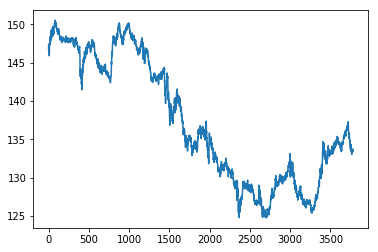

In [5]:
plt.plot(ts['close'])

In [6]:
# break the series into days and overlay them

In [7]:
#rename this column
ts.rename(index=str, columns={'datetime': 'ms'})
#ts['ms'] = ts['datetime']
#Convert milliseconds since epoch to datetime
ts['datetime'] = [datetime.fromtimestamp(ms / 1000) for ms in ts['datetime']]

#Create a date column
ts['date'] = ts['datetime'].apply(lambda x: x.date() )

#Create a time column
#ts['time'] = ts['datetime'].apply(lambda x: datetime.fromtimestamp(x.time()) )
#Going to try and make it a datetime type with all the same date (because matplotlib)
ts['time'] = ts['datetime'].apply(lambda x: datetime(1900,1,1,x.time().hour,x.time().minute))


In [8]:
#ts['datetime'].apply(lambda x: x.time() )

#Get a datetime.time object
#t = ts['datetime'][0].time()

#t = datetime.today().time()
#convert it back to datetime?

#datetime.fromtimestamp(t)
#datetime(1900,1,1,t.hour,t.minute)



datetime.datetime(1900, 1, 1, 8, 30)

In [9]:
#Group by date into several series
ds = ts.groupby(['date'])
#keys = ts.groupby(['date']).groups.keys().

#ts[ts['date']==datetime(2018,12,14).date()]
#ds[keys[0]] = ts[ts['date']==keys[0]]
#keys[0]


In [10]:
ds['datetime'].head()

0      2018-12-14 08:30:00
1      2018-12-14 08:31:00
2      2018-12-14 08:32:00
3      2018-12-14 08:33:00
4      2018-12-14 08:34:00
390    2018-12-17 08:30:00
391    2018-12-17 08:31:00
392    2018-12-17 08:32:00
393    2018-12-17 08:33:00
394    2018-12-17 08:34:00
780    2018-12-18 08:30:00
781    2018-12-18 08:31:00
782    2018-12-18 08:32:00
783    2018-12-18 08:33:00
784    2018-12-18 08:34:00
1170   2018-12-19 08:30:00
1171   2018-12-19 08:31:00
1172   2018-12-19 08:32:00
1173   2018-12-19 08:33:00
1174   2018-12-19 08:34:00
1560   2018-12-20 08:30:00
1561   2018-12-20 08:31:00
1562   2018-12-20 08:32:00
1563   2018-12-20 08:33:00
1564   2018-12-20 08:34:00
1950   2018-12-21 08:30:00
1951   2018-12-21 08:31:00
1952   2018-12-21 08:32:00
1953   2018-12-21 08:33:00
1954   2018-12-21 08:34:00
2340   2018-12-24 08:30:00
2341   2018-12-24 08:31:00
2342   2018-12-24 08:32:00
2343   2018-12-24 08:33:00
2344   2018-12-24 08:34:00
2610   2018-12-26 08:30:00
2611   2018-12-26 08:31:00
2

In [11]:
#Lets normalize the prices by date
#we have to do this outside of the groupby
#means = ds['close'].agg(['min','max']).reset_index()
#df = df.merge(means_stds,on='indx')
#df['a0_normalized'] = (df['a0'] - df['mean']) / df['std']

firsts = ds['close'].first().to_frame()
temp = pd.merge(firsts,ts, on='date')
temp.rename(index=str, columns={'close_x':'close_first','close_y':'close'}, inplace=True)
temp['close_norm'] = temp['close'] - temp['close_first']

ts = temp
ds = ts.groupby(['date'])

#temp = ts.merge(firsts,on='date')
#ds['close'].first().head()
#ds['close_norm'] = ds['close'].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
#ds.head()





In [12]:
#Lets also create an average timeseries by time
timegrouping = ts.groupby(['time'])
tg = timegrouping['close_norm'].agg(['mean'])
tg

,mean
time,
1900-01-01 08:30:00,0.000000
1900-01-01 08:31:00,0.011180
1900-01-01 08:32:00,0.059010
1900-01-01 08:33:00,0.305970
1900-01-01 08:34:00,0.325160
1900-01-01 08:35:00,0.137240
1900-01-01 08:36:00,0.140610
1900-01-01 08:37:00,0.255940
1900-01-01 08:38:00,0.349680


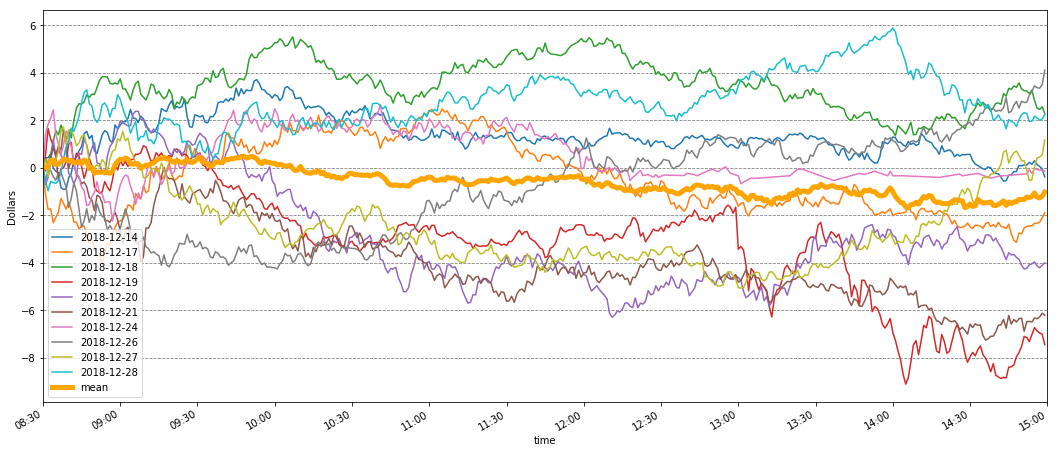

In [13]:
#import matplotlib.ticker as plticker
import matplotlib.dates


#loc = matplotlib.dates.HourLocator(interval = 1)
loc = matplotlib.dates.MinuteLocator(interval = 30)
#loc = plticker.MultipleLocator(base=3000.0) # this locator puts ticks at regular intervals

fig1, ax1 = plt.subplots(figsize=(18,8))

ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
ax1.set_xlim(datetime(1900,1,1,8,30), datetime(1900,1,1,15,0))
ax1.axes.set_ylabel("Dollars")


for index, group in ds:
    group.plot(x='time',y='close_norm',ax=ax1, label=group['date'].min(), x_compat=True)
    
#Plot the average
tg.plot(y='mean',ax=ax1,linewidth=5.0, color="orange")

#Have to set the grid afterwards for some reason
ax1.grid(color='grey', which='major', axis='y', linestyle='--')
plt.show()

In [14]:
# We can see that on average the price is usually slightly up or down until 10:30am

In [15]:
# Can we cluster them into up days and down days a see if there is a common behavior between the two?

#What if we move forward in time and set all series to be in alignment at that time.  We should see by a certain time
# most series will no longer cross the zero line.  This means most traders have decided whether its an up or down day.


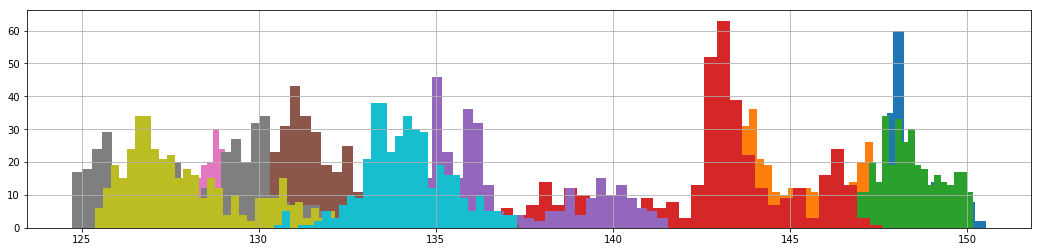

In [16]:
# Lets view the histogram of price grouped by trade date
hist = ds['close'].hist(bins=30, figsize=(18,4))

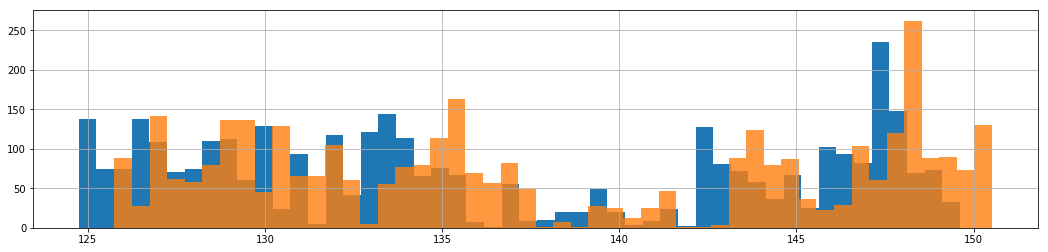

In [17]:
# This shows what price was most frequent, which might be like a position of central tendency
# What we would really like to know is what prices were significant support and reisistance levels.
#These would be prices which caused a reversal in price direction for a significant number of periods.
# We can create a sliding window and select the minimum value within that sliding window.  At each offset we store the minimum value.
# Then we take a histogram of these values.
bins=50
windowsize=30
localminimums = ds['close'].rolling(windowsize).min().dropna()
localminimums.hist(bins=bins, figsize=(18,4), alpha=1.0 )

localmaximums = ds['close'].rolling(windowsize).max().dropna()
localmaximums.hist(bins=bins, figsize=(18,4), alpha=0.8 )





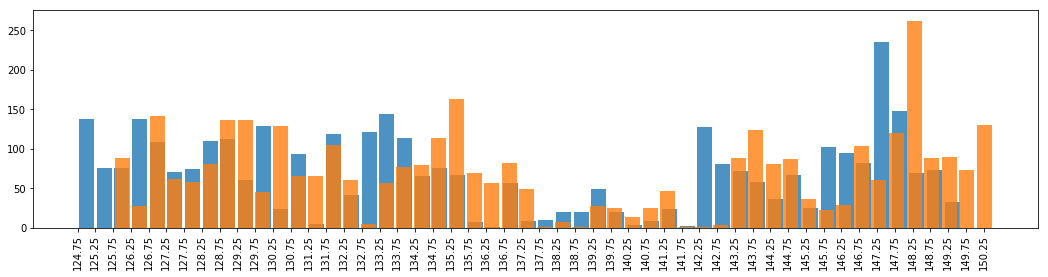

In [18]:
fig2, ax2 = plt.subplots(figsize=(18,4))
temp = plt.hist(x=localminimums, bins=bins, alpha=0.8, rwidth=0.85)
temp = plt.hist(x=localmaximums, bins=bins, alpha=0.8, rwidth=0.85)
major_ticks = np.arange(ts['close'].min(), ts['close'].max(), .5)
ax2.set_xticks(major_ticks)       
temp=plt.xticks(rotation=90)


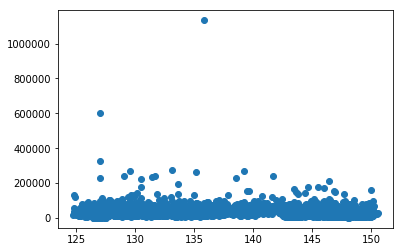

In [19]:
# How is volume distributed among price?
plt.scatter(x=ts['close'],y=ts['volume'])

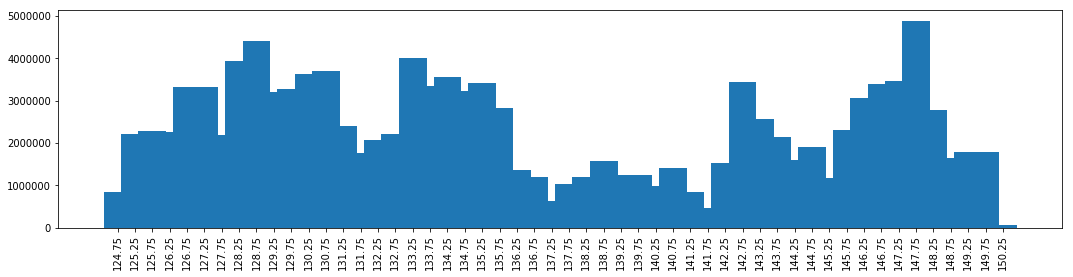

In [20]:
#lets get the total volume by price, binned
bins = np.arange(ts['close'].min(), ts['close'].max(), .5)
ind = np.digitize(ts['close'], bins)
hist = np.zeros(bins.size)
for n in range(ts.shape[0]-1):
    hist[ind[n]-1] += ts['volume'][n-1]

    
fig3, ax3 = plt.subplots(figsize=(18,4))
plt.bar(bins, hist)
temp = ax3.set_xticks(bins)
temp=plt.xticks(rotation=90)   
plt.show()

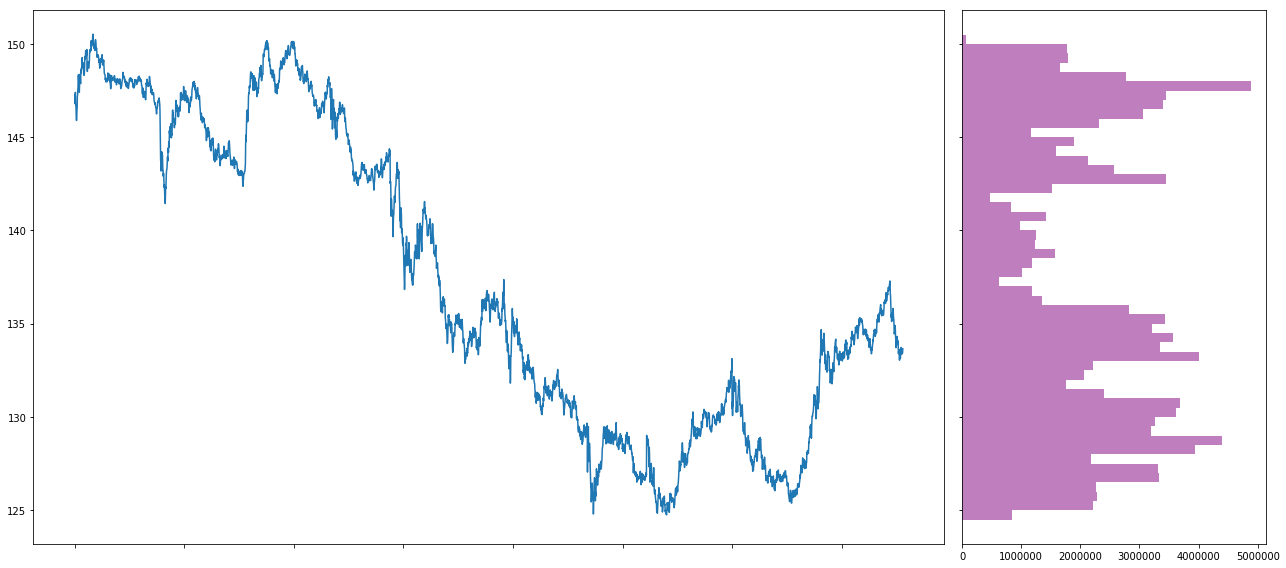

In [21]:
#lets draw this vertically along side the price chart
fig4, (ax4, ax5) = plt.subplots(ncols=2, sharey=True, figsize=(18,8),  gridspec_kw = {'width_ratios':[3, 1]} )
ts['close'].plot(y='mean',ax=ax4)
ax5.barh(bins, hist, color='Purple', alpha=0.5, height=.5)


#draw volume also
#ax4.bar(ts['datetime'].astype(datetime), ts['volume'])

plt.tight_layout()
plt.show()

In [22]:
ts

,date,close_first,close,datetime,high,low,open,volume,time,close_norm
0,2018-12-14,146.807,146.8070,2018-12-14 08:30:00,147.2500,146.5000,147.2100,155073,1900-01-01 08:30:00,0.0000
1,2018-12-14,146.807,147.2388,2018-12-14 08:31:00,147.3600,146.7100,146.7900,24775,1900-01-01 08:31:00,0.4318
2,2018-12-14,146.807,147.2242,2018-12-14 08:32:00,147.6300,146.9900,147.2850,43487,1900-01-01 08:32:00,0.4172
3,2018-12-14,146.807,147.4000,2018-12-14 08:33:00,147.5000,146.3300,147.2500,42930,1900-01-01 08:33:00,0.5930
4,2018-12-14,146.807,146.7876,2018-12-14 08:34:00,147.4200,146.6900,147.3565,35687,1900-01-01 08:34:00,-0.0194
5,2018-12-14,146.807,146.6600,2018-12-14 08:35:00,147.1500,146.4400,146.6600,40772,1900-01-01 08:35:00,-0.1470
6,2018-12-14,146.807,146.5850,2018-12-14 08:36:00,146.8200,146.0200,146.7900,53095,1900-01-01 08:36:00,-0.2220
7,2018-12-14,146.807,145.9700,2018-12-14 08:37:00,146.5300,145.5000,146.5200,95853,1900-01-01 08:37:00,-0.8370
8,2018-12-14,146.807,145.8900,2018-12-14 08:38:00,146.4000,145.7000,145.9600,73916,1900-01-01 08:38:00,-0.9170
9,2018-12-14,146.807,145.9100,2018-12-14 08:39:00,146.3700,145.5700,145.9000,90386,1900-01-01 08:39:00,-0.8970


In [23]:
#plt.plot(ts['close'])

#ts['volume']

#plt.close()
#plt.plot(ts['volume'])

#ds['close']
#ts['close']

#ts['datetime'].astype(datetime)
#plt.plot(ts['volume'])
#plt.show()

#print(matplotlib.get_backend())
#plt.clf()
#plt.plot(ts['volume'])

#Create new dataframe with datetime index
#idx = ts['datetime'].values
data = pd.DataFrame(data={'close': ts['close'].values,
                       'volume': ts['volume'].values})


<BarContainer object of 3780 artists>

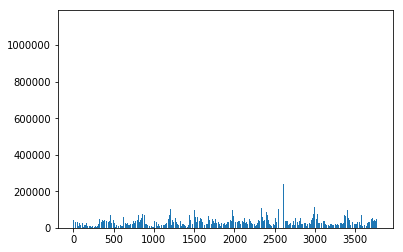

In [24]:
#plt.scatter(data.index, data.volume)
#plt.plot(data.volume)
plt.bar(x=data.index, height=data.volume)
#plt.show()

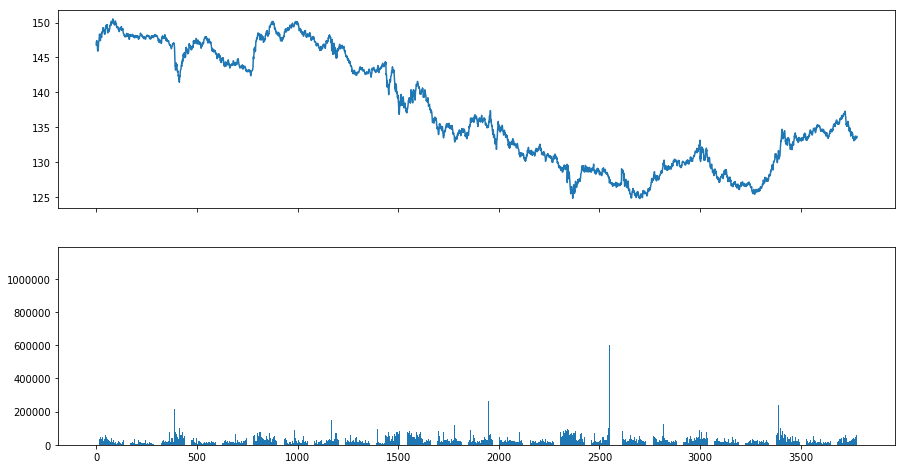

In [25]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,8))
ax[0].plot(data.close)
ax[1].bar(x=data.index, height=data.volume)

#xfmt = matplotlib.dates.DateFormatter('%H:%M')
#ax[1].xaxis.set_major_locator(matplotlib.dates.HourLocator(interval=3))
#ax[1].xaxis.set_major_formatter(xfmt)
#ax[1].xaxis.set_minor_locator(matplotlib.dates.HourLocator(interval=1))
#ax[1].xaxis.set_minor_formatter(xfmt)
#ax[1].get_xaxis().set_tick_params(which='major', pad=25)
#fig.autofmt_xdate()
plt.show()


#ts['datetime'].values
#ts['volume'].values


<BarContainer object of 52 artists>

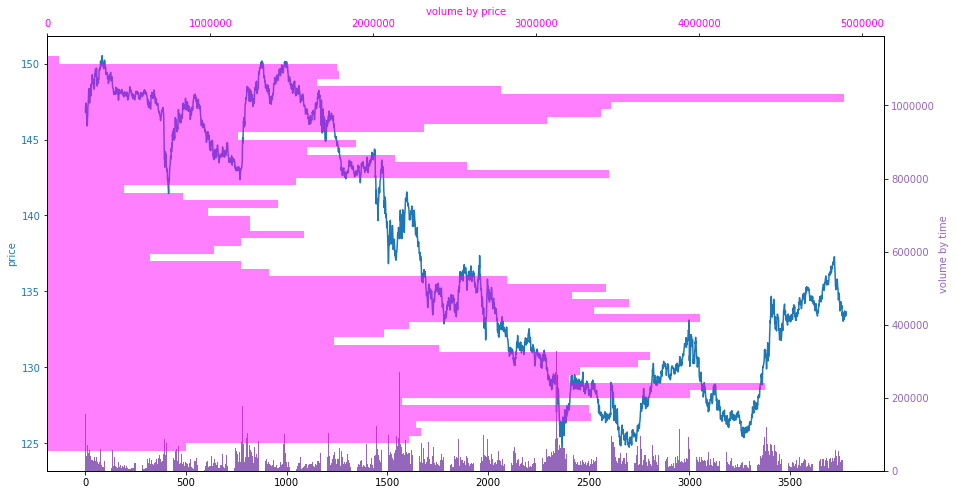

In [26]:
#Demonstrate two plots overlayed
fig, ax1 = plt.subplots(figsize=(15,8))

color = 'tab:blue'
ax1.plot(data.close)
ax1.set_ylabel('price', color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Plot volume by time on bottom
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('volume by time', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax2.bar(x=data.index, height=data.volume, color=color)

#Plot volume by price on the right
ax3 = ax1.twiny()
color = 'Magenta'
ax3.set_xlabel('volume by price', color=color) 
ax3.tick_params(axis='x', labelcolor=color)
ax3.barh(bins, hist, color=color, alpha=0.5, height=.5)


In [27]:
#ts.index
#ts.index.astype(int).min()

#ts.set_index(ts)
np.arange(ts.index.astype(int).min(), ts.index.astype(int).max(), 50)

array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600,
       1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150,
       2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700,
       2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250,
       3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750],
      dtype=int64)

In [28]:
#Create time bins
x_bins = np.arange(ts.index.astype(int).min(), ts.index.astype(int).max(), 50)
#Create indexes to which bin each element points
x_ind = np.digitize(ts.index.astype(int), x_bins)
#Create volumes by time
x_vol = np.zeros(x_bins.size)
for n in range(ts.shape[0]-1):
    x_vol[x_ind[n]-1] += ts['volume'][n-1]

#Normalize
l1= np.linalg.norm(x_vol, ord=1)
x_vol_norm = (x_vol / l1)

In [29]:
#lets get the total volume by price, binned
y_bins = np.arange(ts['close'].min(), ts['close'].max(), .5)
y_ind = np.digitize(ts['close'], y_bins)
y_vol = np.zeros(y_bins.size)
for n in range(ts.shape[0]-1):
    y_vol[y_ind[n]-1] += ts['volume'][n-1]

#Normalize
l1= np.linalg.norm(y_vol, ord=1)
y_vol_norm = (y_vol / l1)

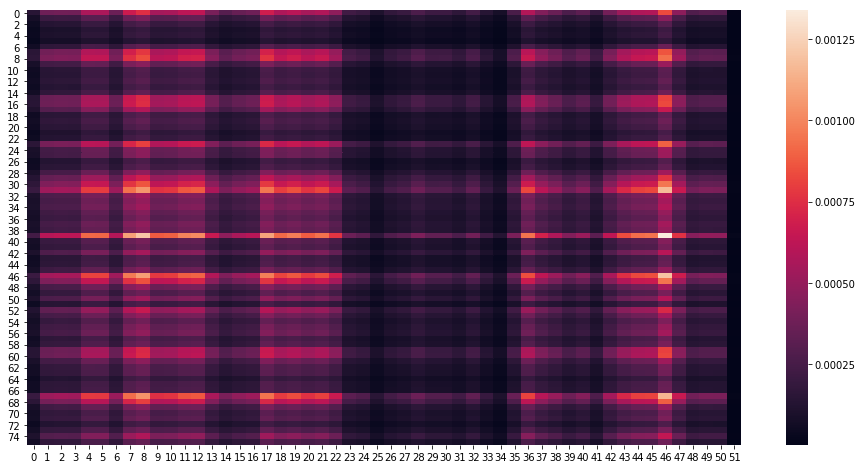

In [30]:
#Create a 2d (price, time) dataset
#Lets create a heatmap (x,y, volume)
#Matrix of x * y
m = np.empty( (x_vol_norm.size, y_vol_norm.size))

for ix in range(x_vol_norm.size):
    for iy in range(y_vol_norm.size):
        #print ("{0} {1} {2} {3}".format(ix, iy, x_vol_norm[ix], y_vol_norm[iy]))
        m[ix,iy] = x_vol_norm[ix] * y_vol_norm[iy]


import seaborn as sns
#plt.figure(figsize = (16,8))
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(m, linewidth=0, ax=ax)


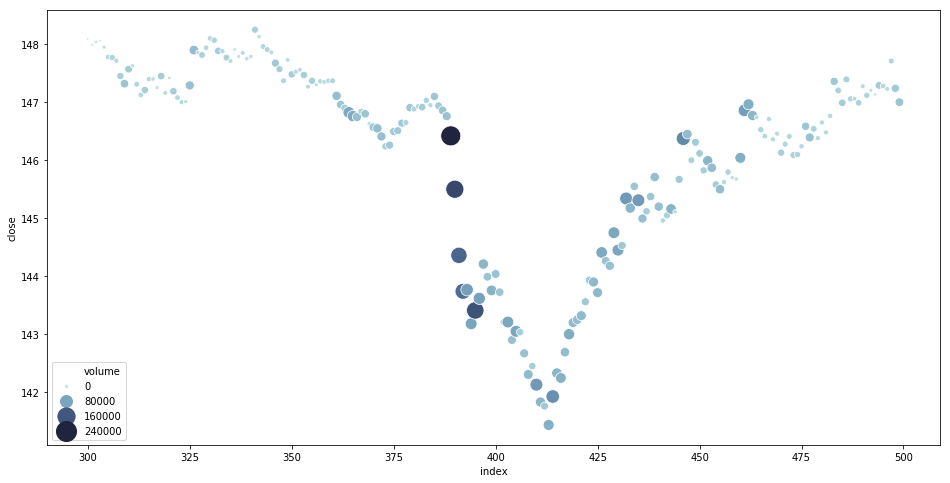

In [155]:
plt.figure(figsize = (16,8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x='index', 
                     y="close",
                     size="volume",
                     hue='volume',
                     palette=cmap, 
                     sizes=(5, 400),
                     data=data.reset_index())

#Subsetting
#data[300:500]

In [131]:
#Resample at 3 minute bars
g = lambda x: int(x/3)
#data
#data.reset_index()  #.groupby(by=g([index]))
#data.iloc[0]
#data.set_index(data.index)
#data.reset_index(drop=True, inplace=True)
#data.groupby(by=g(data.index))

#data.drop('level_0',axis=1, inplace=True)
#data.drop('index',axis=1, inplace=True)



#data.reset_index(inplace=True)
#data.index = 

#idx = pd.Int64Index(range(0, len(ts)))
#data = pd.DataFrame(data={'close': ts['close'].values,
#                       'volume': ts['volume'].values},
#                   index=idx)

#Apparently I don't know how to group by a lambda function still.
#Until I do, I will create a column and group by that column
data['3min']=data['index'].apply(g)
bar_3min = data.groupby(by=['3min']).agg({'close': 'mean', 'volume': 'sum'})
bar_3min.reset_index(inplace=True)
bar_3min.rename(columns={'3min':'index'})




,index,close,volume
0,0,147.090000,223335
1,1,146.949200,119389
2,2,146.148333,222864
3,3,146.285833,209729
4,4,147.310633,170576
5,5,148.091667,127694
6,6,147.905000,189976
7,7,147.798333,125722
8,8,148.208333,107264
9,9,148.305567,137827


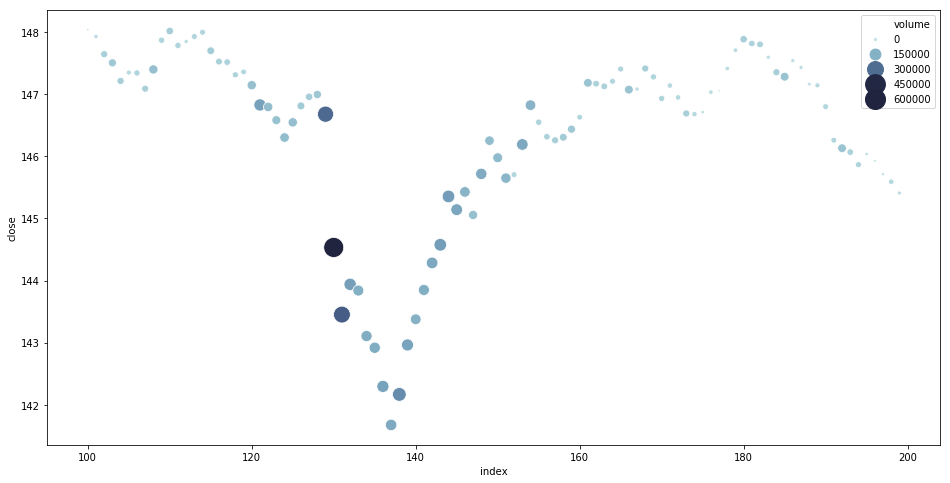

In [152]:
plt.figure(figsize = (16,8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x='index', 
                     y="close",
                     size="volume",
                     hue='volume',
                     palette=cmap, 
                     sizes=(5, 400),
                     data=bar_3min.reset_index())
#useful for subsetting 
#bar_3min[100:200]

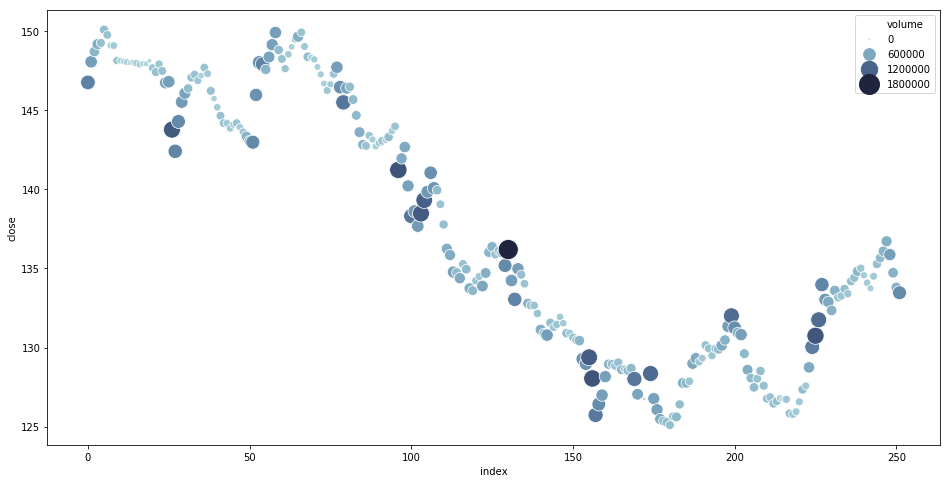

In [141]:
#15 minute
data['15min']=data['index'].apply(lambda x: int(x/15))
bar_15min = data.groupby(by=['15min']).agg({'close': 'mean', 'volume': 'sum'})
bar_15min.reset_index(inplace=True)
bar_15min.rename(columns={'15min':'index'})

plt.figure(figsize = (16,8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x='index', 
                     y="close",
                     size="volume",
                     hue='volume',
                     palette=cmap, 
                     sizes=(1, 400),
                     data=bar_15min.reset_index())